# Autograd

**Autograd** is an **automatic differentiation** engine and usually **speeds up the process of calculating derivatives.**

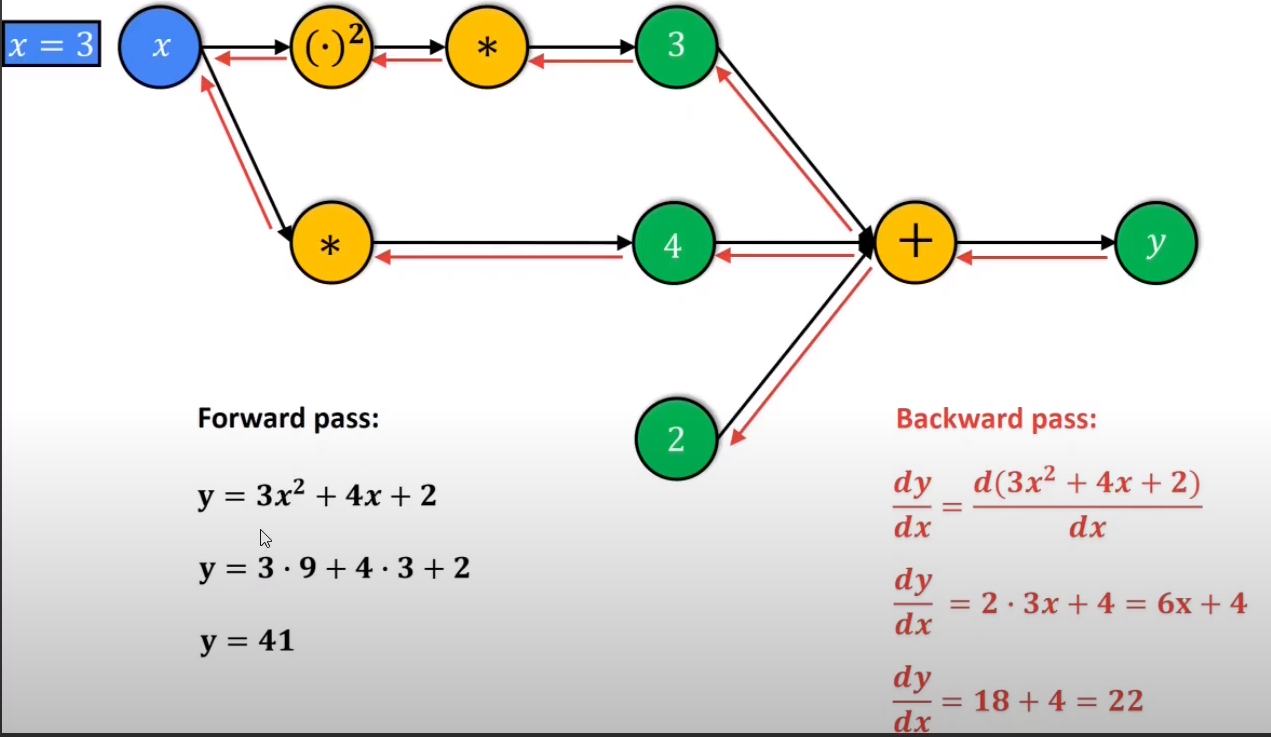

In [3]:
import torch
from torch.autograd import Variable

import warnings
warnings.filterwarnings('ignore')

In [32]:
# x = Variable(torch.ones(2, 2), requires_grad=True)
x = torch.ones(2, 2, requires_grad=True) # same as above in different way
# requires_grad indicates whether to store the gradients or not

y = x + 2
z = y * y * 3
# by default the graph used to compute the grads will be freed
# thus， retain_graph is used to keep the graph after computing
z.backward(gradient=torch.ones(2, 2), retain_graph=True) # backward calculate the partial derivative

print(x.grad) # ∂z/∂x with x = 1
print(y.grad) # ∂z/∂y
print(x.grad_fn)
print(y.grad_fn) # gradient function
print(z.grad_fn)

tensor([[18., 18.],
        [18., 18.]])
None
None


## Gradient Accumulation

In [29]:
z.backward(gradient=torch.ones(2, 2), retain_graph=True)

print(x.grad) # Note: x.grad doubles from previous result
print(y.grad)
print(x.grad_fn)
print(y.grad_fn)
print(z.grad_fn)

tensor([[36., 36.],
        [36., 36.]])
None
None


In [30]:
# Pytorch accumulates the gradient by default, we need to clear the previous values
x.grad.zero_() # set all values to 0
z.backward(gradient=torch.ones(2, 2))

print(x.grad)
print(y.grad)
print(x.grad_fn)
print(y.grad_fn)
print(z.grad_fn)

tensor([[18., 18.],
        [18., 18.]])
None
None


## Turn gradient calculation off

In [36]:
x = torch.tensor(3., requires_grad=True)
print(x)

# two ways to do so
print(x.requires_grad_(False))
print(x.detach())

tensor(3., requires_grad=True)
tensor(3.)
tensor(3.)


## Autograd.Function

In [33]:
# we can define our autograd function
# more details later
class line(torch.autograd.Function):
  @staticmethod
  def forward(ctx, w, x, b):
    # y = w * x + b
    ctx.save_for_backward(w, x, b)
    return w * x + b

  @staticmethod
  def backward(ctx, grad_out):
    w, x, b = ctx.saved_tensors
    grad_w = grad_out * x
    grad_x = grad_out * w
    grad_b = grad_out

    return grad_w, grad_x, grad_b

w = torch.rand(2, 2, requires_grad=True)
x = torch.rand(2, 2, requires_grad=True)
b = torch.rand(2, 2, requires_grad=True)

out = line.apply(w, x, b)
out.backward(torch.ones(2, 2))

print(w, x, b)
print(w.grad, x.grad, b.grad)

tensor([[0.4639, 0.1757],
        [0.6186, 0.6875]], requires_grad=True) tensor([[0.2435, 0.6554],
        [0.6474, 0.8251]], requires_grad=True) tensor([[0.6874, 0.5847],
        [0.8004, 0.4607]], requires_grad=True)
tensor([[0.2435, 0.6554],
        [0.6474, 0.8251]]) tensor([[0.4639, 0.1757],
        [0.6186, 0.6875]]) tensor([[1., 1.],
        [1., 1.]])
